<img height="60" width="260" src="http://www.nycaviation.com/newspage/wp-content/uploads/2016/09/IMG_0300-620x413.jpg"></img>
### <font color='maroon' size= 6 align=middle><b> "NYC Airline DataSet Analysis" </b></font>
# This dataset contains information about all flights that departed from NYC (e.g. EWR, JFK and LGA) in 2013


## <font color ="crimson" size=5><b>"Agenda"</b></font>

1. [Reading the Datasets](#Datasets)<br>
    -1.1 [Importing the Libraries for dataset Analysis](#import)<br>
    -1.2 [Coverting the Time data and slicing it for better representation if required : Optional](#optional)<br>
    -1.3 [Profiling the datasets](#profiling)<br><br>
    
2. [Business Question Identified](#Question)<br>
    -2.1 [Delay Departure](#Delay)<br>
     -2.1.1 [Which day have maximum number of flight delay- i.e. which day appear to worst in term of departure delay](#maxf)<br>
     -2.1.2 [Monthwise Average delay departure information of flight from NYC to all destination](#mond)<br><br>
       
   -2.2 [Best Airport in term of time Departure in terms of %](#bestAir)<br>
     -2.2.1 [Obtaining "Origin" where departure delay is less and "Destination" where arrival delay is less](#orig)<br><br>
       
   -2.3 [Aircraft Speed Analysis](#speedAnalysis)<br>
     -2.3.1 [Finding out the top 5 fastest flight details from NYC](#fastf)<br><br>
        
   -2.4 [On time arrival % analysis](#ontimearr)<br>
     -2.4.1 [Top 5 destination where flight arrives early than expected arrival time](#top5)<br><br>
        
   -2.5 [Maximum number of flights headed to some particular destination](#maxflight)<br>
     -2.5.1 [Finding the unique flights flied from NYC i.e(from JFK, LGA and EWR) to all destination in 2013](uniq)<br>
     -2.5.2 [The top 5 Spot destination flight from NYC on month basis count](stop5)<br>
     -2.5.3 [To find, the total number of unique Airline  headed to 'ATL‘(found destination which max no of flight from NYC](uniqA)<br>
     -2.5.4 [To find, the total number of unique flights  headed to 'ATL‘(found destination which max no of flight from NYC](uniqtotA)<br>
   


#  1. Reading the Datasets <a id='Datasets'>

## 1.1 Importing the Libraries for dataset Analys<a id='import'>

In [27]:
import numpy as np
import pandas as pd
import pandas_profiling as pds
import matplotlib.pyplot as plt
import seaborn as sn
from bokeh.plotting import figure,show,output_notebook
from matplotlib import style

## 1.2 Coverting the Time data and slicing it for better representation if required : Optional <a id='optional'>

In [28]:
def convert (number):
        if ((len(str(number))>3)):
            return str(number)[0:2] + str(number)[2:]
        else:
            return "0" + str(number)[:1]+str(number)[1:]

## 1.3 Profiling the datasets <a id='profiling'>


In [31]:
flight_data=pd.read_csv("D:/BigDataProjects/DataScience/Upx/Python_Learning_Tracks/Project/ProjectDatasets/Project_1_NYC-Flight_data/project_1_NYC-Flightdata/flight_data.csv")
report= pds.ProfileReport(flight_data)
report.to_file("D:/BigDataProjects/DataScience/Upx/Python_Learning_Tracks/Project/ProjectDatasets/Project_1_NYC-Flight_data/project_1_NYC-Flightdata/flight_data_pro.html")
dataset_f=pd.DataFrame(flight_data)
dataset_f= dataset_f.dropna()
print("The total number of rows and column in dataset after removing null value is", dataset_f.shape)


plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['font.size']=13

The total number of rows and column in dataset after removing null value is (327346, 19)


# <font color ='0066CC'><b>2.Business Question Identified</b></font><a id='Question'>

## <font color='green'><b> 2.1 Delay Departure</b></font><a id='Delay'>


In [32]:
day_delay=dataset_f.groupby(['day','month'], as_index=False).agg({'dep_delay': 'mean'})
day_delay_max=day_delay['dep_delay'].max()
day_delay_info=day_delay[day_delay['dep_delay']==day_delay_max]
print(day_delay_info)

    day  month  dep_delay
86    8      3   83.64787


### 2.1.1 Which day have maximum number of flight delay- i.e. which day appear to worst in term of departure delay <a id='maxf'>


In [33]:
max_flightdealy_day=dataset_f[dataset_f['dep_delay'] > 0].groupby(['day','month'], as_index=False).agg({'flight': 'count'})
max_flightdealy_info = max_flightdealy_day[max_flightdealy_day['flight'].max() == max_flightdealy_day['flight']]
print("Day and month which have maximum number of flight delay" '\n' ,max_flightdealy_info)

Day and month which have maximum number of flight delay
      day  month  flight
275   23     12     673


### 2.1.2 Monthwise Average delay departure information of flight from NYC to all destination <a id='mond'>


C:\Users\Mowgli\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


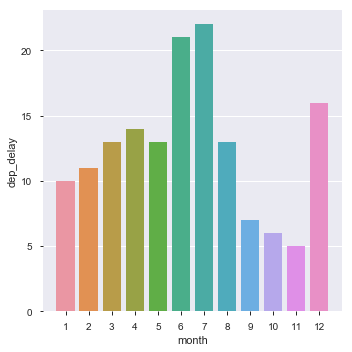

In [37]:
%matplotlib inline
month_delayinfo = dataset_f.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
month_delayinfo['dep_delay']=np.round(month_delayinfo['dep_delay'],0)
sn.factorplot(x='month', y='dep_delay', data=month_delayinfo, kind='bar')
plt.savefig("D:/fig1")
plt.plot()
plt.show()


## <font color='green'><b>2.2 Best Airport in term of time Departure in terms of %</b></font><a id= 'bestair'>

### 2.2.1 Obtaining "Origin" where departure delay is less and "Destination" where arrival delay is less<a id='orig'>

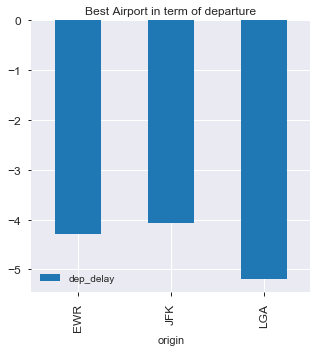

In [38]:
airport_info_df=pd.DataFrame(dataset_f,columns=['day','month','dep_delay','arr_delay','carrier','origin','dest','flight'])
airport_info1=airport_info_df[airport_info_df['dep_delay']<1]
best_airport=airport_info1.sort_values(['dep_delay']).groupby(['origin']).agg({'dep_delay':'mean'})
best_airport.plot(kind='bar', title ="Best Airport in term of departure",figsize=(5,5),legend=True, fontsize=12)
plt.savefig("D:/fig2")
plt.show()
plt.close()

## <font color='green'><b>2.3 Aircraft Speed Analysis </b></font><a id= 'speedAnalysis'>

### 2.3.1 Finding out the top 5 fastest flight details from NYC<a id='fastf'>

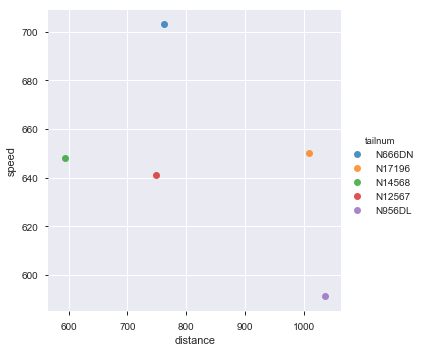

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed
216447,2013,5,25,1709.0,1700,9.0,1923.0,1937,-14.0,DL,1499,N666DN,LGA,ATL,65.0,762,17,0,25-05-2013 17:00,703.4
251999,2013,7,2,1558.0,1513,45.0,1745.0,1719,26.0,EV,4667,N17196,EWR,MSP,93.0,1008,15,13,2/7/2013 15:00,650.3
205388,2013,5,13,2040.0,2025,15.0,2225.0,2226,-1.0,EV,4292,N14568,EWR,GSP,55.0,594,20,25,13-05-2013 20:00,648.0
157516,2013,3,23,1914.0,1910,4.0,2045.0,2043,2.0,EV,3805,N12567,EWR,BNA,70.0,748,19,10,23-03-2013 19:00,641.1
10223,2013,1,12,1559.0,1600,-1.0,1849.0,1917,-28.0,DL,1902,N956DL,LGA,PBI,105.0,1035,16,0,12/1/2013 16:00,591.4


In [39]:
%matplotlib inline

dataset_f['speed']=dataset_f['distance']/(dataset_f['air_time']/60)
fastest_flight_max=dataset_f.sort_values(['speed'], ascending=False)
fastest_flight_max['speed']=np.round(fastest_flight_max['speed'],1)
fastest_flight_max_top5=fastest_flight_max.head(5)
sn.lmplot(x = 'distance', y='speed', data = fastest_flight_max_top5,fit_reg=False, hue="tailnum")
plt.savefig("D:/fig3")
plt.show()
fastest_flight_max_top5

## <font color='green'><b>2.4 On time arrival % analysis."</b></font><a id='ontimearr'>

### 2.4.1 Top 5 destination where flight arrives early than expected arrival time<a id ='top5'>

The details of top 5 flight info which arrives on destination 



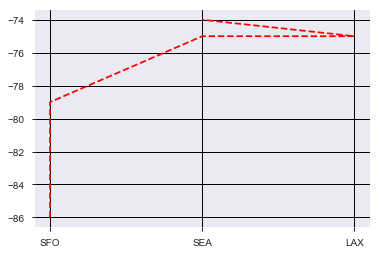

C:\Users\Mowgli\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


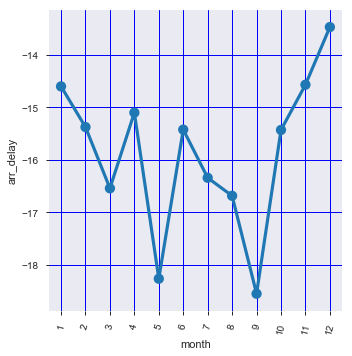

In [40]:
carrier_info=dataset_f['carrier'].unique()


early_arrival=dataset_f[dataset_f['arr_delay']<=0]
top5carrier_info=(early_arrival.sort_values(['arr_delay'], ascending=True)).head(5)
top5carrier_info_details=pd.DataFrame(top5carrier_info, columns=['day','month','origin','dest','arr_delay','carrier','flight','tailnum','distance','speed'])
print("The details of top 5 flight info which arrives on destination",'\n')

plt.plot(top5carrier_info_details.dest,top5carrier_info_details.arr_delay,linestyle='--', color='red')
plt.grid(True, color='k')
plt.savefig("D:/fig4")
plt.show()

carrier_arrival=early_arrival.sort_values(['arr_delay'], ascending=True).groupby(['month'],as_index=False).agg({'arr_delay':'mean'})
sn.factorplot(x='month', y='arr_delay', data=carrier_arrival)
plt.xticks(rotation=75)
plt.grid(True, color='b')
plt.legend
plt.savefig("D:/fig5")
plt.show()


## <font color='green'><b>2.5 Maximum number of flights headed to some particular destination"</b></font><a id='maxflight'>

### 2.5.1 Finding the unique flights flied from NYC i.e(from JFK, LGA and EWR) to all destination in 2013<a id='uniq'>

In [41]:
%matplotlib inline
NYC_allflight=dataset_f['dest'].unique()


NYC_allflightcount=len(NYC_allflight)
print("The total number unique destination flight  from NYC is"+ "::" ,NYC_allflightcount)
print('\n')

originwise_flight=dataset_f.groupby(['origin'])["dest"].count()
print("The following are the total count of destination flight from the following origion\n",originwise_flight)


The total number unique destination flight  from NYC is:: 104


The following are the total count of destination flight from the following origion
 origin
EWR    117127
JFK    109079
LGA    101140
Name: dest, dtype: int64


### 2.5.2 The top 5 Spot destination flight from NYC on month basis count<a id='spot5'>

The top 5 Spot destination flight from NYC is


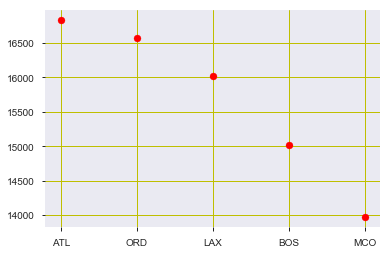

,dest,month
4,ATL,16837
68,ORD,16566
49,LAX,16026
11,BOS,15022
53,MCO,13967


In [42]:
NYC_allflight1=dataset_f.groupby(['dest'],as_index=False).agg({'month':'count'})
maximun_count_flight=NYC_allflight1.sort_values(['month'], ascending=False)
print("The top 5 Spot destination flight from NYC is")
top_destination_flight = maximun_count_flight.head(5)
plt.scatter(top_destination_flight.dest,top_destination_flight.month, color='red')
plt.legend
plt.savefig("D:/fig6")
plt.grid(True, color='y')
plt.show()
top_destination_flight


### 2.5.3 To find, the total number of unique Airline  headed to 'ATL‘(found destination which max no of flight from NYC<a id='uniqA'>

In [43]:
ATL_dest=dataset_f[dataset_f['dest']=='ATL']
Airline_count=(ATL_dest['carrier']).unique()
print("The total number of Airline  headed to 'ATL' from NYC is",len(Airline_count))
print('\n')


The total number of Airline  headed to 'ATL' from NYC is 7




### 2.5.4 To find, the total number of unique flights  headed to 'ATL‘(found destination which max no of flight from NYC<a id='uniqtotA'>


In [44]:
flight_ATL_dest_count=ATL_dest['tailnum'].unique()
print("The total unique flight  headed to 'ATL' from NYC is",len(flight_ATL_dest_count))
print('\n')

The total unique flight  headed to 'ATL' from NYC is 1178




  ### print("                     **********************************Thank You**************************************************                ")